In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pylab
import math
import random
import pandas as pd
import sklearn
from sklearn.cluster import KMeans
from IPython.display import display

import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression

import statsmodels as sm
import ipywidgets as widgets

%matplotlib inline
sns.set()

In [2]:
df = pd.read_excel('Выборка_ектб.xlsx', sheet_name = 0)
df

ID  Мусор Агрегатор   LN(Цена)      Цена  Цена_перв  \
0         1_этажи      0     этажи  15.761421   7000000    7200000   
1         2_этажи      0     этажи  16.231424  11200000   11400000   
2         3_этажи      0     этажи  15.274126   4300000    4500000   
3         4_этажи      0     этажи  15.555977   5700000    6000000   
4         5_этажи      0     этажи  14.557448   2100000    2200000   
...           ...    ...       ...        ...       ...        ...   
13331  8466_авито      1     авито  15.659230   6320000          0   
13332  8467_авито      0     авито  15.147877   3790000          0   
13333  8468_авито      0     авито  15.054464   3452000          0   
13334  8469_авито      0     авито  15.176487   3900000          0   
13335  8470_авито      0     авито  15.176487   3900000          0   

          Прогноз_1     Прогноз_2            MAE      MAPE  ...  \
0      7.357429e+06  7.315261e+06 -315260.780670 -0.045037  ...   
1               NaN           NaN            NaN       NaN  ...   
2      4.955072e+06  4.923574e+06 -623574.436842 -0.145017  ...   
3               NaN           NaN            NaN       NaN  ...   
4               NaN           NaN            NaN       NaN  ...   
...             ...           ...            ...       ...  ...   
13331           NaN           NaN            NaN       NaN  ...   
13332           NaN  4.253817e+06 -463816.720736 -0.122379  ...   
13333           NaN  3.777030e+06 -325030.387942 -0.094157  ...   
13334           NaN  3.866094e+06   33905.795052  0.008694  ...   
13335           NaN  4.485492e+06 -585492.324408 -0.150126  ...   

       Нежилые помещения на первом этаже  строение  \
0                                    NaN       NaN   
1                                    NaN       NaN   
2                                    NaN       NaN   
3                                    NaN       NaN   
4                                    NaN       NaN   
...                                  ...       ...   
13331                                NaN       NaN   
13332                                NaN       NaN   
13333                                NaN       NaN   
13334                                NaN       NaN   
13335                                NaN       NaN   

      Квартира угловая / торцевая Способ продажи  Отделка  \
0                             NaN            NaN      NaN   
1                             NaN            NaN      NaN   
2                             NaN            NaN      NaN   
3                             NaN            NaN      NaN   
4                             NaN            NaN      NaN   
...                           ...            ...      ...   
13331                         NaN    переуступка      NaN   
13332                         NaN            NaN      NaN   
13333                         NaN            NaN      NaN   
13334                         NaN            NaN      NaN   
13335                         NaN            NaN      NaN   

       Название новостройки  Корпус, строение Тип участия        Срок сдачи  \
0                       NaN               NaN         NaN               NaN   
1                       NaN               NaN         NaN               NaN   
2                       NaN               NaN         NaN               NaN   
3                       NaN               NaN         NaN               NaN   
4                       NaN               NaN         NaN               NaN   
...                     ...               ...         ...               ...   
13331    ЖК «Ботаника LIFE»               NaN      другое   Сдан 4 кв. 2023   
13332                   NaN               NaN         NaN               NaN   
13333                   NaN               NaN         NaN               NaN   
13334                   NaN               NaN         NaN               NaN   
13335                   NaN               NaN         NaN               NaN   

       Запланирован снос  
0          

In [3]:
df = df[df['Мусор'] == 0]
df = df[df['Выбросы'] == 0]
df = df[df['dup_res'] == 0]
df = df[df['Многоуровневость'] == 0]
df = df[df['Терраса'] == 0]
df.reset_index(drop = True , inplace = True )
df

ID  Мусор Агрегатор   LN(Цена)     Цена  Цена_перв  \
0        1_этажи      0     этажи  15.761421  7000000    7200000   
1        3_этажи      0     этажи  15.274126  4300000    4500000   
2        6_этажи      0     этажи  15.483217  5300000          0   
3        7_этажи      0     этажи  15.679591  6450000    6490000   
4       15_этажи      0     этажи  15.823725  7450000    7500000   
...          ...    ...       ...        ...      ...        ...   
7885  8464_авито      0     авито  15.293700  4385000          0   
7886  8467_авито      0     авито  15.147877  3790000          0   
7887  8468_авито      0     авито  15.054464  3452000          0   
7888  8469_авито      0     авито  15.176487  3900000          0   
7889  8470_авито      0     авито  15.176487  3900000          0   

         Прогноз_1     Прогноз_2            MAE      MAPE  ...  \
0     7.357429e+06  7.315261e+06 -315260.780670 -0.045037  ...   
1     4.955072e+06  4.923574e+06 -623574.436842 -0.145017  ...   
2     6.115291e+06  6.056768e+06 -756768.110306 -0.142786  ...   
3     6.246966e+06  6.173033e+06  276967.222331  0.042941  ...   
4     7.502204e+06  7.472315e+06  -22315.213466 -0.002995  ...   
...            ...           ...            ...       ...  ...   
7885  5.291969e+06  5.297718e+06 -912718.329665 -0.208146  ...   
7886           NaN  4.253817e+06 -463816.720736 -0.122379  ...   
7887           NaN  3.777030e+06 -325030.387942 -0.094157  ...   
7888           NaN  3.866094e+06   33905.795052  0.008694  ...   
7889           NaN  4.485492e+06 -585492.324408 -0.150126  ...   

      Нежилые помещения на первом этаже  строение Квартира угловая / торцевая  \
0                                   NaN       NaN                         NaN   
1                                   NaN       NaN                         NaN   
2                                   NaN       NaN                         NaN   
3                                   NaN       NaN                         NaN   
4                                   NaN       NaN                         NaN   
...                                 ...       ...                         ...   
7885                                NaN       NaN                         NaN   
7886                                NaN       NaN                         NaN   
7887                                NaN       NaN                         NaN   
7888                                NaN       NaN                         NaN   
7889                                NaN       NaN                         NaN   

     Способ продажи  Отделка  Название новостройки     Корпус, строение  \
0               NaN      NaN                   NaN                  NaN   
1               NaN      NaN                   NaN                  NaN   
2               NaN      NaN                   NaN                  NaN   
3               NaN      NaN                   NaN                  NaN   
4               NaN      NaN                   NaN                  NaN   
...             ...      ...                   ...                  ...   
7885            NaN      NaN        ЖК «Миллениум»   Дом 5 (секц. А, Б)   
7886            NaN      NaN                   NaN                  NaN   
7887            NaN      NaN                   NaN                  NaN   
7888            NaN      NaN                   NaN                  NaN   
7889            NaN      NaN                   NaN                  NaN   

     Тип участия        Срок сдачи  Запланирован снос  
0            NaN               NaN                NaN  
1            NaN               NaN                NaN  
2            NaN               NaN                NaN  
3            NaN               NaN                NaN  
4            NaN               NaN                NaN  
...          ...               ...                ...  
7885      другое   Сдан 2 кв. 2017                NaN  
7886         NaN               NaN                NaN  
7887         NaN          

In [4]:
def compact_district(dataf, target, district, random_state = 42, k = 8, figsize = (15, 5)):
    """
    dataf - DataFrame, из которого используются данные 
    target - столбец с ценой за кв.м.  
    district - столбец с районами города
    random_state - параметр, фиксирующий случайность, задан по умолчанию = 42 
    k - количество кластеров (укрупненных районов), задается вручную
    figsize - размер графиков, задан по умолчанию (15, 5)
    """
    sort_dist_med = dataf.groupby(district)[target].agg(['median']).round().sort_values('median', ascending = False)   #группируем районы по медианной цене, округл и сорт
    
    kmeans = KMeans(n_clusters = k, random_state = random_state)                                                       #объявляем kmeans
    kmeans.fit(sort_dist_med[['median']])                                                                              #обучаем kmeans

    sort_dist_med['Районы_Kmeans'] = kmeans.labels_
    sort_dist_med = sort_dist_med.sort_values('median', ascending = False)                                             #передаем сортированные метки в df

    mapping = {}                                                                                                       #создаем словарь для меток
    current_label = k 

    for i, row in sort_dist_med.iterrows():                                                                            #цикл,упорядочивающий метки по убыванию медианной цены                                                                 
        if row['Районы_Kmeans'] not in mapping:
            mapping[row['Районы_Kmeans']] = current_label
            current_label -= 1

    sort_dist_med['Районы_Kmeans'] = sort_dist_med['Районы_Kmeans'].map(mapping)
    
    table_comp = sort_dist_med.groupby('Районы_Kmeans')['median'].agg(['min', 'max'])                                  #выводим df с кластерами, и мин и макс медианами для кластера
    table_comp.columns = ['median_min', 'median_max']
    table_comp['Прирост_med'] = table_comp['median_max'].pct_change() 
    table_comp['Районы_2'] = sort_dist_med.groupby('Районы_Kmeans').apply(lambda x: list(x.index))                     #добавляем в df столбец со списком рай-нов в кластере
    pd.set_option('display.max_colwidth', None)                                                                        #показываем всю ширину столбца
    
    
    fig, ax = plt.subplots(1, 2, figsize = figsize)                                                                    #строим два графика в одном окне
    
    sns.scatterplot(                                                                                                   #строим точечную диаграмму
                    data = sort_dist_med, 
                    x = 'median', 
                    y = [0]*len(sort_dist_med),                                                                        #все точки будут лежать на 0 по оси y
                    hue = 'Районы_Kmeans', 
                    s = 100, 
                    palette = 'Reds',
                    ax = ax[0]                                                                                         #помещаем в 1 столбец окна
                   )
    
    ax[0].set_xlabel('Медианная_цена')
    ax[0].set_label('Районы_2')
    
    sns.boxplot(                                                                                                       #строим boxplot
                data = sort_dist_med,
                x = 'Районы_Kmeans', 
                y = 'median',     
                palette = 'Reds',
                ax = ax[1]                                                                                             #помещаем в 2 столбец окна
               )
    
    #ax[1].set_xlabel('Медианная_цена')
    #ax[1].set_label('Районы_2')
    ax[0].get_legend().remove()     #отключаем легенду у площади
    #ax[1].get_legend().remove()     #отключаем легенду у ГП
    
    fig.suptitle(f'Распределение районов по кластерам (k = {k})')                                                      #подпись к 2 графикам

    return sort_dist_med, table_comp, plt.show

In [5]:
print(len(df['Районы_2'].unique()))
df['Районы_2'].unique()

33


array(['Академический', 'Центральный', 'Пионерский', 'Уктус', 'Южный',
       'Компрессорный_Лечебный_Птицефабрика', 'Уралмаш', 'Эльмаш',
       'Юго_Западный', 'Вторчермет_УНЦ_Совхозный',
       'Втузгородок_Первомайский', 'Космонавтов', 'Старая_сортировка',
       'Новая_сортировка', 'Парковой', 'Ботанический', 'ВИЗ_Большеконный',
       'Кольцово_Новокольцовский', 'Химмаш', 'Звездочка_Завокзальный',
       'Шарташский_рынок_Сибирский', 'Центр', 'Солнечный', 'Вокзальный',
       'Комсомольский', 'Зеленая_Роща', 'Елизавет_Рудный_Нижнеисетский',
       'Заречный', 'Волгоградский', 'Шарташ_Калиновский_Изоплит',
       'Синие_Камни', 'Клевер_Парк', 'Зеленая_горка'], dtype=object)

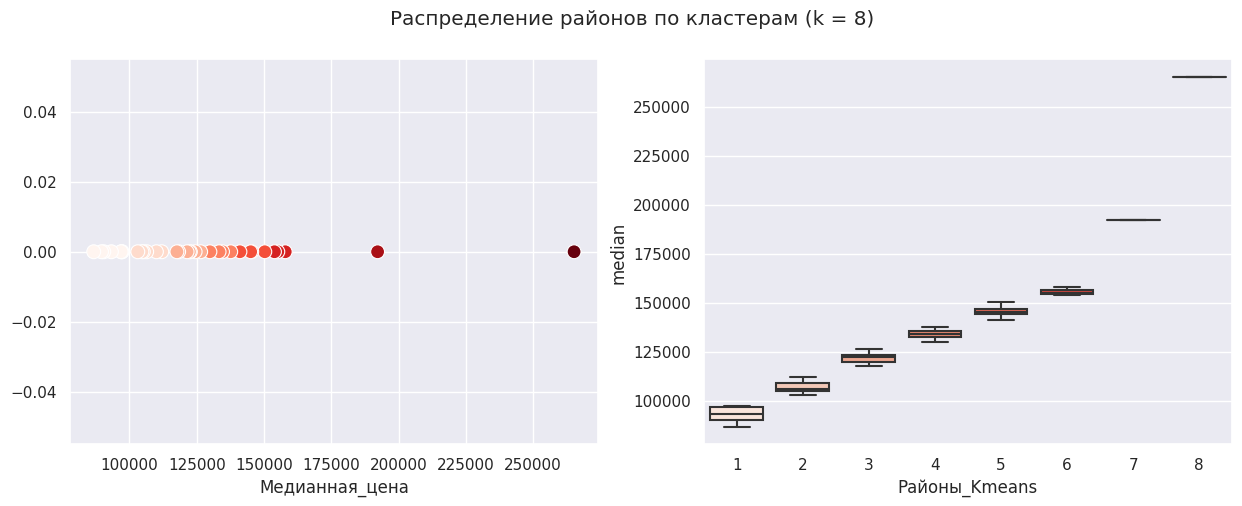

In [6]:
tab_1, tab_2, _ = compact_district(
                                   dataf = df, 
                                   target = 'Цена(кв.м)',
                                   district = 'Районы_2',
                                   random_state = 42,
                                   k = 8,
                                   figsize = (15, 5)
                                  )

In [7]:
tab_2

median_min  median_max  Прирост_med  \
Районы_Kmeans                                        
1                 86697.0     97193.0          NaN   
2                103077.0    111980.0     0.152141   
3                117626.0    126453.0     0.129246   
4                129885.0    137625.0     0.088349   
5                141045.0    150289.0     0.092018   
6                153885.0    157895.0     0.050609   
7                192226.0    192226.0     0.217429   
8                265269.0    265269.0     0.379985   

                                                                                                                                                                              Районы_2  
Районы_Kmeans                                                                                                                                                                           
1              [Звездочка_Завокзальный, Компрессорный_Лечебный_Птицефабрика, Синие_Камни, Елизавет_Рудный_Нижнеисетский, Химмаш, Кольцово_Новокольцовский, Шарташ_Калиновский_Изоплит]  
2                                                                                      [Эльмаш, Зеленая_горка, Уралмаш, Новая_сортировка, Старая_сортировка, Вторчермет_УНЦ_Совхозный]  
3                                                                             [Вокзальный, Волгоградский, Академический, Уктус, Пионерский, Комсомольский, Шарташский_рынок_Сибирский]  
4                                                                                                                                        [Заречный, Солнечный, Парковой, Юго_Западный]  
5                                                                                                                                 [Южный, Ботанический, Центральный, ВИЗ_Большеконный]  
6                                                                                                                                [Космонавтов, Зеленая_Роща, Втузгородок_Первомайский]  
7                                                                                                                                                                              [Центр]  
8                                                                                                                                                                        [Клевер_Парк]

In [8]:
tab_1

median  Районы_Kmeans
Районы_2                                                    
Клевер_Парк                          265269.0              8
Центр                                192226.0              7
Космонавтов                          157895.0              6
Зеленая_Роща                         155128.0              6
Втузгородок_Первомайский             153885.0              6
Южный                                150289.0              5
Ботанический                         145438.0              5
Центральный                          145038.0              5
ВИЗ_Большеконный                     141045.0              5
Заречный                             137625.0              4
Солнечный                            134572.0              4
Парковой                             133291.0              4
Юго_Западный                         129885.0              4
Вокзальный                           126453.0              3
Волгоградский                        124390.0              3
Академический                        122633.0              3
Уктус                                122266.0              3
Пионерский                           121407.0              3
Комсомольский                        118265.0              3
Шарташский_рынок_Сибирский           117626.0              3
Эльмаш                               111980.0              2
Зеленая_горка                        110000.0              2
Уралмаш                              106378.0              2
Новая_сортировка                     105140.0              2
Старая_сортировка                    104598.0              2
Вторчермет_УНЦ_Совхозный             103077.0              2
Звездочка_Завокзальный                97193.0              1
Компрессорный_Лечебный_Птицефабрика   97170.0              1
Синие_Камни                           96885.0              1
Елизавет_Рудный_Нижнеисетский         93269.0              1
Химмаш                                90434.0              1
Кольцово_Новокольцовский              89596.0              1
Шарташ_Калиновский_Изоплит            86697.0              1

In [9]:
# Добавляем в наш df столбец со значениями Районов_KMeans из df_1
mapping = dict(zip(tab_1.index, tab_1['Районы_Kmeans']))  # Делаем словарь, который сопоставляет Районы_2 (это индекс!) и Районы_Kmeans в df_1
df['Районы_Kmeans'] = df['Районы_2'].apply(lambda x: mapping.get(x))  # добавляем столбец в df
df

ID  Мусор Агрегатор   LN(Цена)     Цена  Цена_перв  \
0        1_этажи      0     этажи  15.761421  7000000    7200000   
1        3_этажи      0     этажи  15.274126  4300000    4500000   
2        6_этажи      0     этажи  15.483217  5300000          0   
3        7_этажи      0     этажи  15.679591  6450000    6490000   
4       15_этажи      0     этажи  15.823725  7450000    7500000   
...          ...    ...       ...        ...      ...        ...   
7885  8464_авито      0     авито  15.293700  4385000          0   
7886  8467_авито      0     авито  15.147877  3790000          0   
7887  8468_авито      0     авито  15.054464  3452000          0   
7888  8469_авито      0     авито  15.176487  3900000          0   
7889  8470_авито      0     авито  15.176487  3900000          0   

         Прогноз_1     Прогноз_2            MAE      MAPE  ...  строение  \
0     7.357429e+06  7.315261e+06 -315260.780670 -0.045037  ...       NaN   
1     4.955072e+06  4.923574e+06 -623574.436842 -0.145017  ...       NaN   
2     6.115291e+06  6.056768e+06 -756768.110306 -0.142786  ...       NaN   
3     6.246966e+06  6.173033e+06  276967.222331  0.042941  ...       NaN   
4     7.502204e+06  7.472315e+06  -22315.213466 -0.002995  ...       NaN   
...            ...           ...            ...       ...  ...       ...   
7885  5.291969e+06  5.297718e+06 -912718.329665 -0.208146  ...       NaN   
7886           NaN  4.253817e+06 -463816.720736 -0.122379  ...       NaN   
7887           NaN  3.777030e+06 -325030.387942 -0.094157  ...       NaN   
7888           NaN  3.866094e+06   33905.795052  0.008694  ...       NaN   
7889           NaN  4.485492e+06 -585492.324408 -0.150126  ...       NaN   

      Квартира угловая / торцевая Способ продажи Отделка  \
0                             NaN            NaN     NaN   
1                             NaN            NaN     NaN   
2                             NaN            NaN     NaN   
3                             NaN            NaN     NaN   
4                             NaN            NaN     NaN   
...                           ...            ...     ...   
7885                          NaN            NaN     NaN   
7886                          NaN            NaN     NaN   
7887                          NaN            NaN     NaN   
7888                          NaN            NaN     NaN   
7889                          NaN            NaN     NaN   

      Название новостройки     Корпус, строение  Тип участия  \
0                      NaN                  NaN          NaN   
1                      NaN                  NaN          NaN   
2                      NaN                  NaN          NaN   
3                      NaN                  NaN          NaN   
4                      NaN                  NaN          NaN   
...                    ...                  ...          ...   
7885        ЖК «Миллениум»   Дом 5 (секц. А, Б)       другое   
7886                   NaN                  NaN          NaN   
7887                   NaN                  NaN          NaN   
7888                   NaN                  NaN          NaN   
7889                   NaN                  NaN          NaN   

            Срок сдачи Запланирован снос  Районы_Kmeans  
0                  NaN               NaN              3  
1                  NaN               NaN              5  
2                  NaN               NaN              3  
3                  NaN               NaN              3  
4                  NaN               NaN              5  
...                ...               ...            ...  
7885   Сдан 2 кв. 2017               NaN              4  
7886               NaN               NaN              3  
7887               NaN               NaN              3  
7888               NaN               NaN              3  
7889               NaN               NaN              3  

[7890 rows x 155 columns]

# Зависимость удельной цены от площади

In [10]:
def square_price(dataf, target, repair, square, district_km, km, n = 10, median = False, repair_ind = None):
    """
    dataf - DataFrame, из которого используются данные
    target - название столбца (цена за 1 кв.м)
    repair - столбец с видами ремонта
    square - столбец с площадями квартир
    district_km - столбец с кластеризованными районами города
    km - кластер района, который исследуем
    n - количество объектов в усреднении (его необходимо изменять в зависимости от объема отсортированных данных), по умолчанию 10
    median - усреднение по медиане (median = True), по умолчанию False (усреднение по mean)
    repair_ind - строковая переменная, с помощью которой можно вывести график для конкретного вида отделки, например, 'стандартный'
    """
    plt.figure(figsize = (15, 5))
    
    if len(dataf[dataf[district_km] == km]) <= 30:                                                                #если данных мало, то анализ не проводится
        return print('Мало значений в выборке (менее 30)')

    else:
        if repair_ind != None:
            s_1 = dataf[district_km] == km 
            s_2 = dataf[repair] == repair_ind
            
            try:
                dataf_sort = dataf[s_1 & s_2][[square, target]]                                                   #фильтруем по кластеру района и отделке
            except:
                return print('Данный вид отделки отсутствует!')
            
            dataf_sort = dataf_sort.sort_values(by = square, ascending = True)                                    #сортируем по площади от мин до макс
            dataf_sort = dataf_sort.reset_index(drop = True)                                                      #сбрасываем индекс
            
            if len(dataf_sort) >= n * 3:
                s_group = zip(*[iter(list(dataf_sort[square]))] * n)                                              #группировка по n элементов для усреднения площади (нужна доработка)
                p_group = zip(*[iter(list(dataf_sort[target]))] * n)                                              #группировка по n элементов для усреднения удельной цены (нужна доработка)
                
                mean_sp_all = []
                
                for s, p in zip(s_group, p_group):
                    if median == False:
                        mean_sp = {'Площадь_ср': np.average(list(s)), 'Цена_ср': np.average(list(p))}             #если median == False, то рассчитывается среднее
                        x_av = 'Площадь_ср'
                        y_av = 'Цена_ср'
                    else:
                        mean_sp = {'Площадь_мед': np.median(list(s)), 'Цена_мед': np.median(list(p))}             #иначе (median == True) рассчитывается медиана
                        x_av = 'Площадь_мед'
                        y_av = 'Цена_мед'
                    
                    mean_sp_all.append(mean_sp)
            
                dataf_result = pd.DataFrame(mean_sp_all)                                                           #создаем DF

                sns.scatterplot(                                                                                   #строим график
                                data = dataf_result, 
                                x = x_av, 
                                y = y_av,                                                                       
                                #hue = 'Районы_Kmeans', 
                                s = 20,
                                #legend = 'full',
                                #palette = 'Set2',
                                #ax = ax[0] 
                               )
               
                plt.title(f'Зависимость удельной цены от площади в разрезе по состоянию отделки {repair_ind} в районе {km}')
                #plt.legend(legend)
                plt.show
                
            else:
                return print(f'Мало значений в выборке (менее {n * 3}). Попробуйте уменьшить интервал усреднения n.')
        
            return dataf_result, repair_ind
       
        else:
            legend = []                                                                                           #список состояний отделки для легенды
            dataf_results = []                                                                                    #список отсортированных таблиц

            for i, rep in enumerate(list(dataf[repair].unique())):                                                #перебираем все имеющиеся состояния отделки с итератором

                s_1 = dataf[district_km] == km                                                                    #фильтр для отбора кластера по району
                s_2 = dataf[repair] == rep                                                                        #фильтр по отделке

                dataf_sort = dataf[s_1 & s_2][[square, target]]                                                   #фильтруем по кластеру района и отделке
                dataf_sort = dataf_sort.sort_values(by = square, ascending = True)                                #сортируем по площади от мин до макс
                dataf_sort = dataf_sort.reset_index(drop = True)                                                  #сбрасываем индекс

                if len(dataf_sort) >= n * 3:                                                                      #если объем отсортированной выборки < n * 3

                    legend.append(rep)                                                                            #записываем отделку в список legend (см. выше)

                    s_group = zip(*[iter(list(dataf_sort[square]))] * n)                                          #группировка по n элементов для усреднения площади (нужна доработка)
                    p_group = zip(*[iter(list(dataf_sort[target]))] * n)                                          #группировка по n элементов для усреднения удельной цены (нужна доработка)

                    mean_sp_all = []                                                                              #список усредненных значений

                    for s, p in zip(s_group, p_group):                                                            #цикл усреднения площадей и удельных цен
                        if median == False:
                            mean_sp = {'Площадь_ср': np.average(list(s)), 'Цена_ср': np.average(list(p))}         #если median == False, то рассчитывается среднее
                            x_av = 'Площадь_ср'
                            y_av = 'Цена_ср'
                        else:
                            mean_sp = {'Площадь_мед': np.median(list(s)), 'Цена_мед': np.median(list(p))}         #иначе (median == True) рассчитывается медиана
                            x_av = 'Площадь_мед'
                            y_av = 'Цена_мед'

                        mean_sp_all.append(mean_sp)                                                               #записываем средние значения в список

                    dataf_result = pd.DataFrame(mean_sp_all)                                                      #создаем DF
                    dataf_results.append(mean_sp_all)                                                             #собираем средние значения площадей и цен по всем видам отделки в один общий список

                    sns.scatterplot(                                                                              #строим график
                                    data = dataf_result, 
                                    x = x_av, 
                                    y = y_av,                                                                       
                                    #hue = 'Районы_Kmeans', 
                                    s = 20,
                                    #legend = 'full',
                                    #palette = 'Set2',
                                    #ax = ax[0] 
                                   )
                else:
                    pass

            plt.title(f'Зависимость удельной цены от площади в разрезе по состояниям отделки в районе {km}')
            plt.legend(legend)
            plt.show
        
            return dataf_results, legend

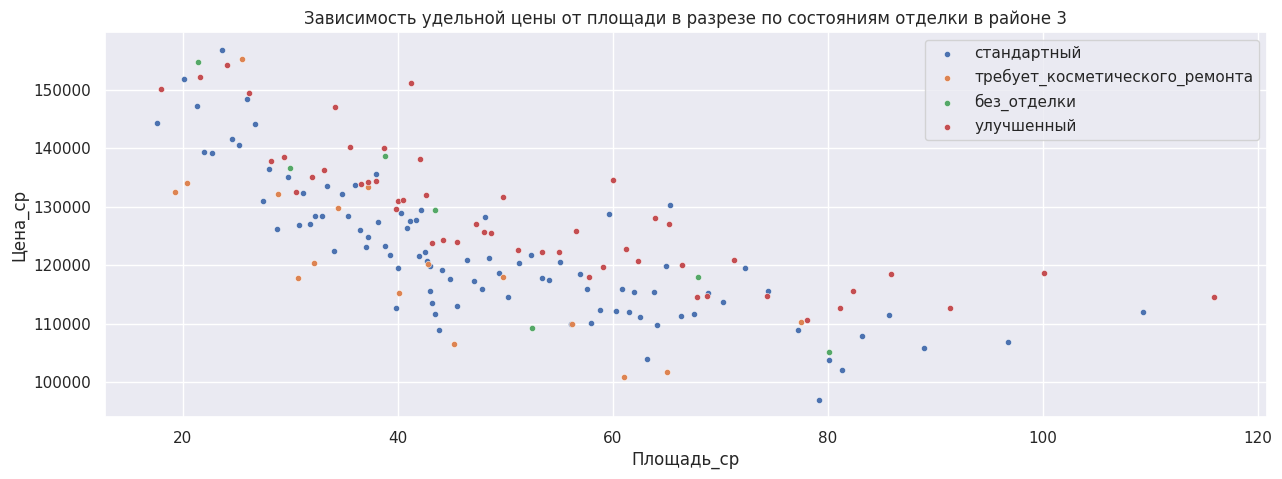

In [11]:
tab_3, name = square_price(
                           dataf = df, 
                           target = 'Цена(кв.м)', 
                           repair = 'Ремонт_1', 
                           square = 'ОПлощадь', 
                           district_km = 'Районы_Kmeans', 
                           km = 3,
                           n = 15,
                           median = False, #True False
                           #repair_ind = 'улучшенный'
                          )

In [12]:
#print(name)
n = 3
print(name[n])         #меняя значение в квадратных скобках мы получаем вид отделки, для которой формируется таблица ниже
pd.DataFrame(tab_3[n]) #меняя значение в квадратных скобках мы получаем df со средними значениями для разных видов отделки

улучшенный


Площадь_ср        Цена_ср
0    18.000000  150037.213538
1    21.600000  152095.903670
2    24.093333  154181.487362
3    26.108667  149461.524207
4    28.180000  137879.999871
5    29.406667  138526.765524
6    30.552667  132445.272394
7    32.000000  135128.864066
8    33.104667  136350.732973
9    34.158667  147105.471011
10   35.526667  140162.619767
11   36.573333  133958.716452
12   37.233333  134190.412407
13   38.000000  134329.938151
14   38.733333  140094.650106
15   39.784667  129647.258070
16   40.006667  130932.144638
17   40.500000  131164.720846
18   41.186667  151108.313971
19   42.026667  138187.232171
20   42.646667  131927.455281
21   43.129333  123852.439198
22   44.240000  124226.388264
23   45.533333  124040.693977
24   47.266667  127007.937456
25   48.006667  125601.096790
26   48.694667  125510.736685
27   49.773333  131573.726717
28   51.200000  122604.818623
29   53.446667  122292.115063
30   54.966667  122295.173173
31   56.533333  125929.292228
32   57.766667  118014.351960
33   59.040000  119713.860617
34   60.013333  134599.490512
35   61.222000  122716.497662
36   62.346000  120727.588072
37   63.886667  128013.340485
38   65.233333  127125.774292
39   66.413333  120058.563488
40   67.825333  114504.365902
41   68.762000  114752.661178
42   71.313333  120896.610092
43   74.355333  114749.750874
44   78.093333  110699.829581
45   81.140000  112621.601461
46   82.353333  115569.988324
47   85.886667  118493.646146
48   91.346667  112674.084325
49  100.093333  118603.014144
50  115.966667  114603.605863

# Графики

# Зависимость цены от площади (общий график + линейный тренд)

<function matplotlib.pyplot.show(close=None, block=None)>

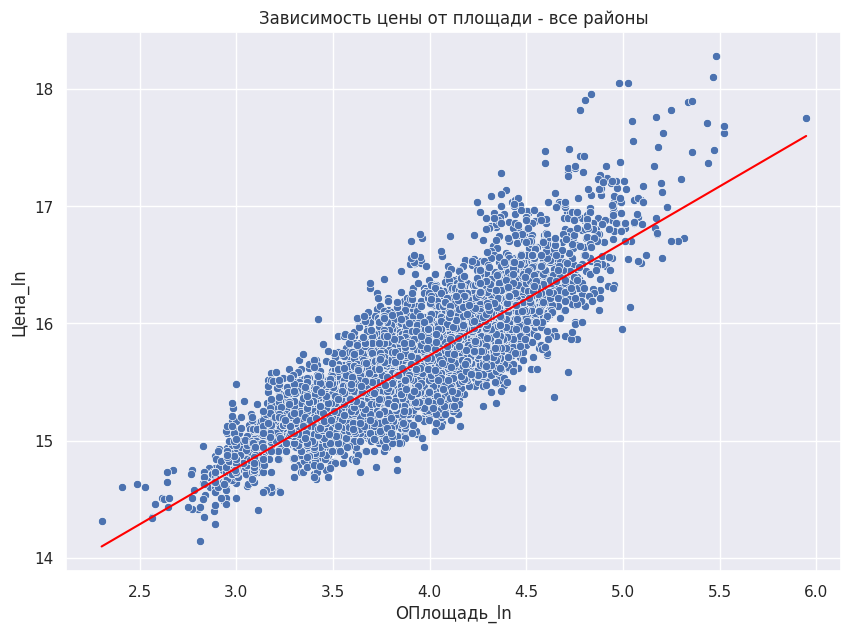

In [14]:
df['ОПлощадь_ln'] = np.log(df['ОПлощадь'])
df['Цена_ln'] = np.log(df['Цена'])

X = df['ОПлощадь_ln'].values.reshape(-1, 1)
Y = df['Цена_ln'].values

lr = LinearRegression().fit(X, Y)

Y0 = lr.intercept_ + X.min() * lr.coef_
Y1 = lr.intercept_ + X.max() * lr.coef_

plt.figure(figsize = (10, 7))

sns.scatterplot(x = df['ОПлощадь_ln'], y = df['Цена_ln'])
plt.plot([X.min(), X.max()], [Y0, Y1], color = 'red')

plt.xlabel('ОПлощадь_ln')
plt.ylabel('Цена_ln')
plt.title('Зависимость цены от площади - все районы')
plt.show

# Зависимость цены от площади (plotly.express)

In [ ]:
# преобразование Районы_Kmeans в категориальный фактор
df['Районы_Kmeans_str'] = df['Районы_Kmeans'].astype(int).astype(str)
df['Районы_Kmeans_str']

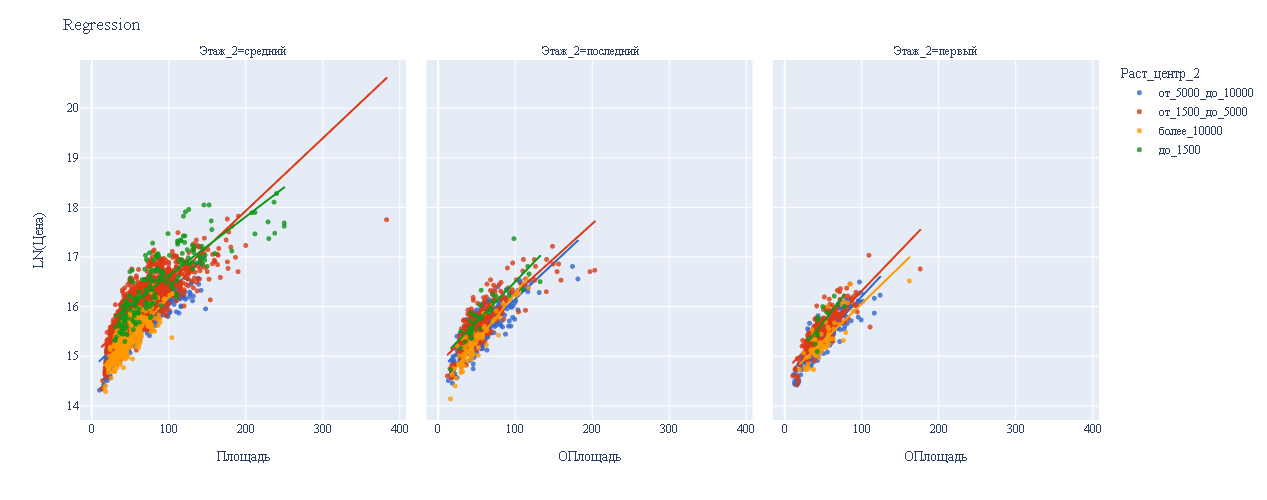

Раст_центр_2     Этаж_2  \
0   от_5000_до_10000    средний   
1   от_5000_до_10000  последний   
2   от_5000_до_10000     первый   
3    от_1500_до_5000    средний   
4    от_1500_до_5000  последний   
5    от_1500_до_5000     первый   
6        более_10000    средний   
7        более_10000  последний   
8        более_10000     первый   
9            до_1500    средний   
10           до_1500  последний   
11           до_1500     первый   

                                                                             px_fit_results  
0   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b7368290>  
1   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b7368390>  
2   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b7368450>  
3   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b73684d0>  
4   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b7368850>  
5   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b723d250>  
6   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b723d350>  
7   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b723d550>  
8   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b723d690>  
9   <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b723d790>  
10  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b72320d0>  
11  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7fa6b7232350>

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                 1.021e+04
Date:                Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                        15:22:57   Log-Likelihood:                 1083.3
No. Observations:                3072   AIC:                            -2163.
Df Residuals:                    3070   BIC:                            -2151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7448      0.008   1791.945      0.0

In [69]:
#https://plotly.com/python/linear-fits/
colors = ["#FFECEC", "#FFCCCC", "#FF9999", "#FF7777", "#FF4444", "#FF2222", "#DD0000", "#AA0000", "#770000"]

fig = px.scatter(
                 data_frame = df,
                 x = 'ОПлощадь', 
                 y = 'LN(Цена)',
                 #log_x = True,     #логарифмирование
                 #log_y = True,     #логарифмирование
                 facet_col = 'Этаж_2',
                 color = 'Раст_центр_2',   #для отражения нескольких линий регрессии на графике необходимо указывать категориальный фактор. Районы_Kmeans - числовая
                 trendline = 'ols',      
                             # ols - обычная линейная регрессия методом МНК (OLS).
                             # lowess - нелинейная регрессия
                             # moving average: rolling (windows), ewm (haplflife), expanding - скользящее среднее 
                 #trendline_scope = 'overall', #если хотим построить только 1 линию тренда
                 #trendline_color_override = 'black', #задать цвет линии тренда
                
                 #trendline_options = dict(log_x = True, log_y = True),
                 #trendline_options = dict(frac = 0.1),  #сглаживание для нелинейной регрессии, по умолчанию 0.6666
                 #trendline_options = dict(function = 'median', window = 5),   #скользящее среднее, можно задать функцию расчета - медиана, max, min
                 
                 color_discrete_sequence = px.colors.qualitative.G10, #colors
                 opacity = 0.8
                )

fig.update_traces(marker_size = 5,
                  selector = dict(mode = 'markers')
                 )

fig.update_layout(autosize = False,
                  width = 1300,
                  height = 500,
                  title = 'Regression',
                  xaxis_title = 'Площадь',
                  yaxis_title = 'LN(Цена)',
                  font = dict(family = 'Helvetica Neue')
                 )

fig.show()

# Вывод результатов регрессии
results = px.get_trendline_results(fig)
display(pd.DataFrame(results))
print('=========================================')
#print(results.query("Раст_центр_2 == 'от_1500_до_5000' and Этаж_2 == 'средний'").px_fit_results.iloc[0].summary())
print(results.px_fit_results.iloc[0].summary())

# Зависимость удельной цены от площади (plotly.express)

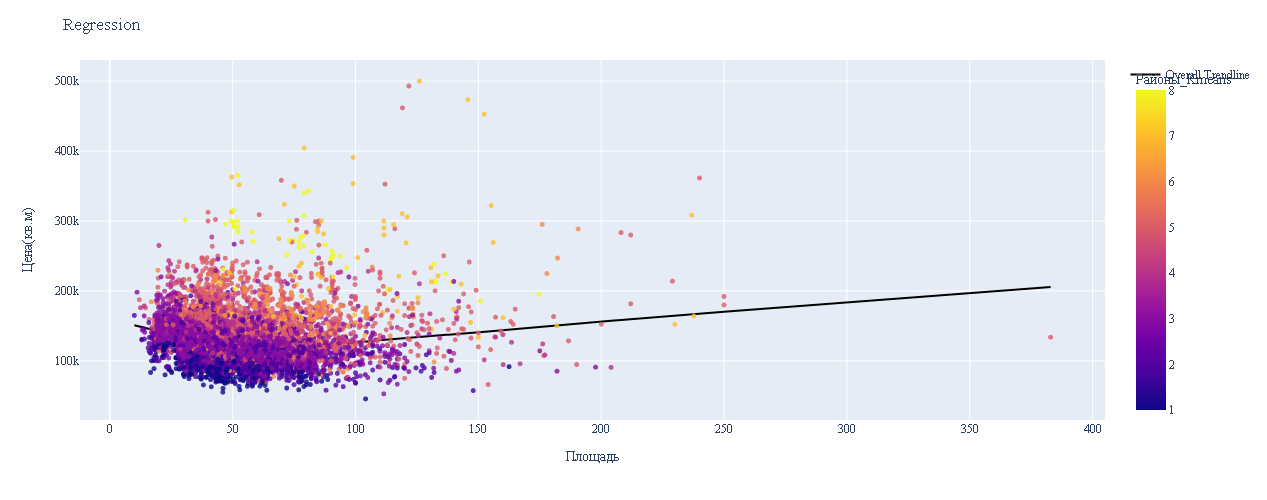

In [70]:
fig = px.scatter(
                 data_frame = df,
                 x = 'ОПлощадь', 
                 y = 'Цена(кв.м)',
                 #log_x = True,     #логарифмирование
                 #log_y = True,     #логарифмирование
                 #facet_col = 'Этаж_2',
                 color = 'Районы_Kmeans',   #для отражения нескольких линий регрессии на графике необходимо указывать категориальный фактор. Районы_Kmeans - числовая
                 trendline = 'lowess',      
                             # ols - обычная линейная регрессия методом МНК (OLS).
                             # lowess - нелинейная регрессия
                             # moving average: rolling (windows), ewm (haplflife), expanding - скользящее среднее 
                 trendline_scope = 'overall', #если хотим построить только 1 линию тренда
                 trendline_color_override = 'black', #задать цвет линии тренда
                
                 #trendline_options = dict(log_x = True, log_y = True),
                 #trendline_options = dict(frac = 0.1),  #сглаживание для нелинейной регрессии, по умолчанию 0.6666
                 #trendline_options = dict(function = 'median', window = 5),   #скользящее среднее, можно задать функцию расчета - медиана, max, min
                 
                 color_discrete_sequence = px.colors.qualitative.G10, #colors
                 opacity = 0.8
                )

fig.update_traces(
                  marker_size = 5,
                  selector = dict(mode = 'markers')
                 )

fig.update_layout(
                  autosize = False,
                  width = 1300,
                  height = 500,
                  title = 'Regression',
                  xaxis_title = 'Площадь',
                  yaxis_title = 'Цена(кв.м)',
                  font = dict(family = 'Helvetica Neue')
                 )

fig.show()

# Зависимость цены от площади (Boxplot)

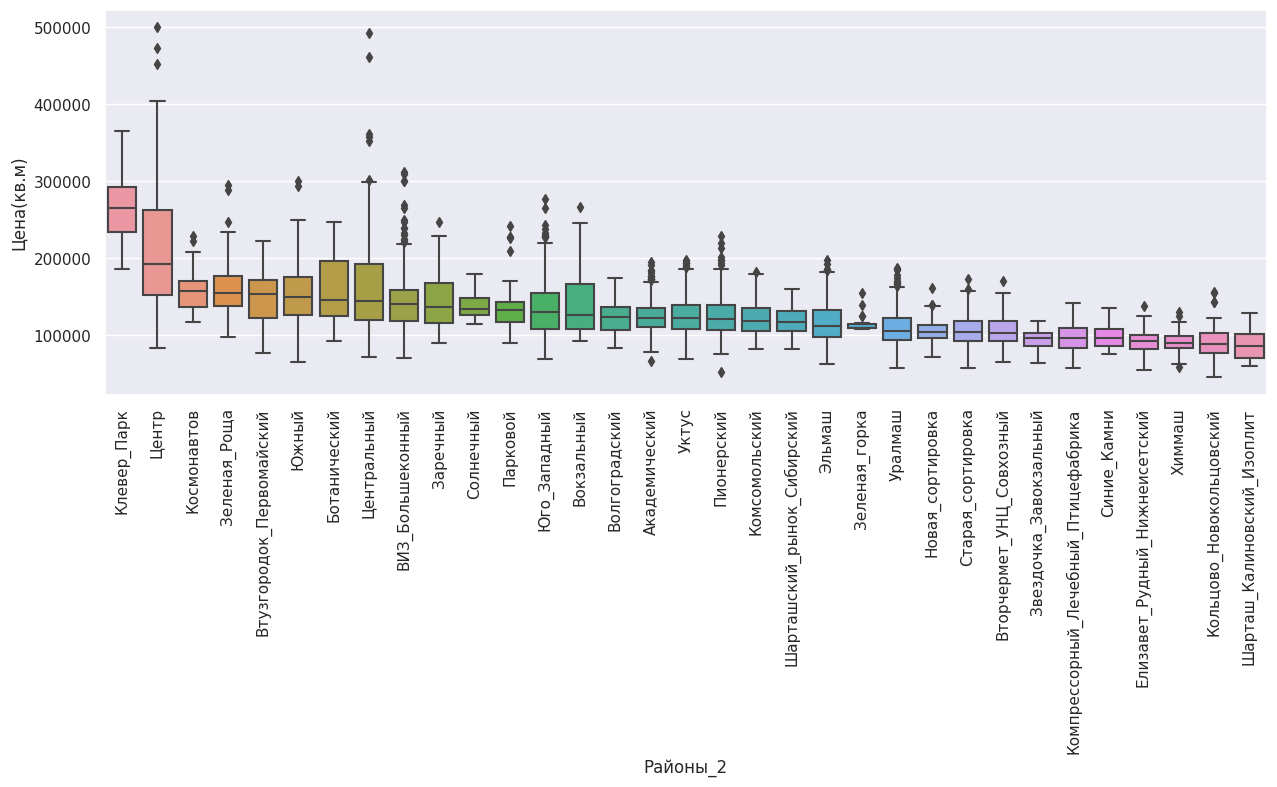

In [73]:
plt.figure(figsize = (15, 5))

sns.boxplot(data = df,
            x = df['Районы_2'],
            y = df['Цена(кв.м)'],
            #palette = 'Reds'
            order = df.groupby('Районы_2')['Цена(кв.м)'].agg('median').sort_values(ascending = False).index
           )

plt.xticks(rotation = 90)
plt.show();

# Зависимость цены от площади (Районы_2)

/opt/conda/python37/lib/python3.7/site-packages/seaborn/regression.py:582: UserWarning:

sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



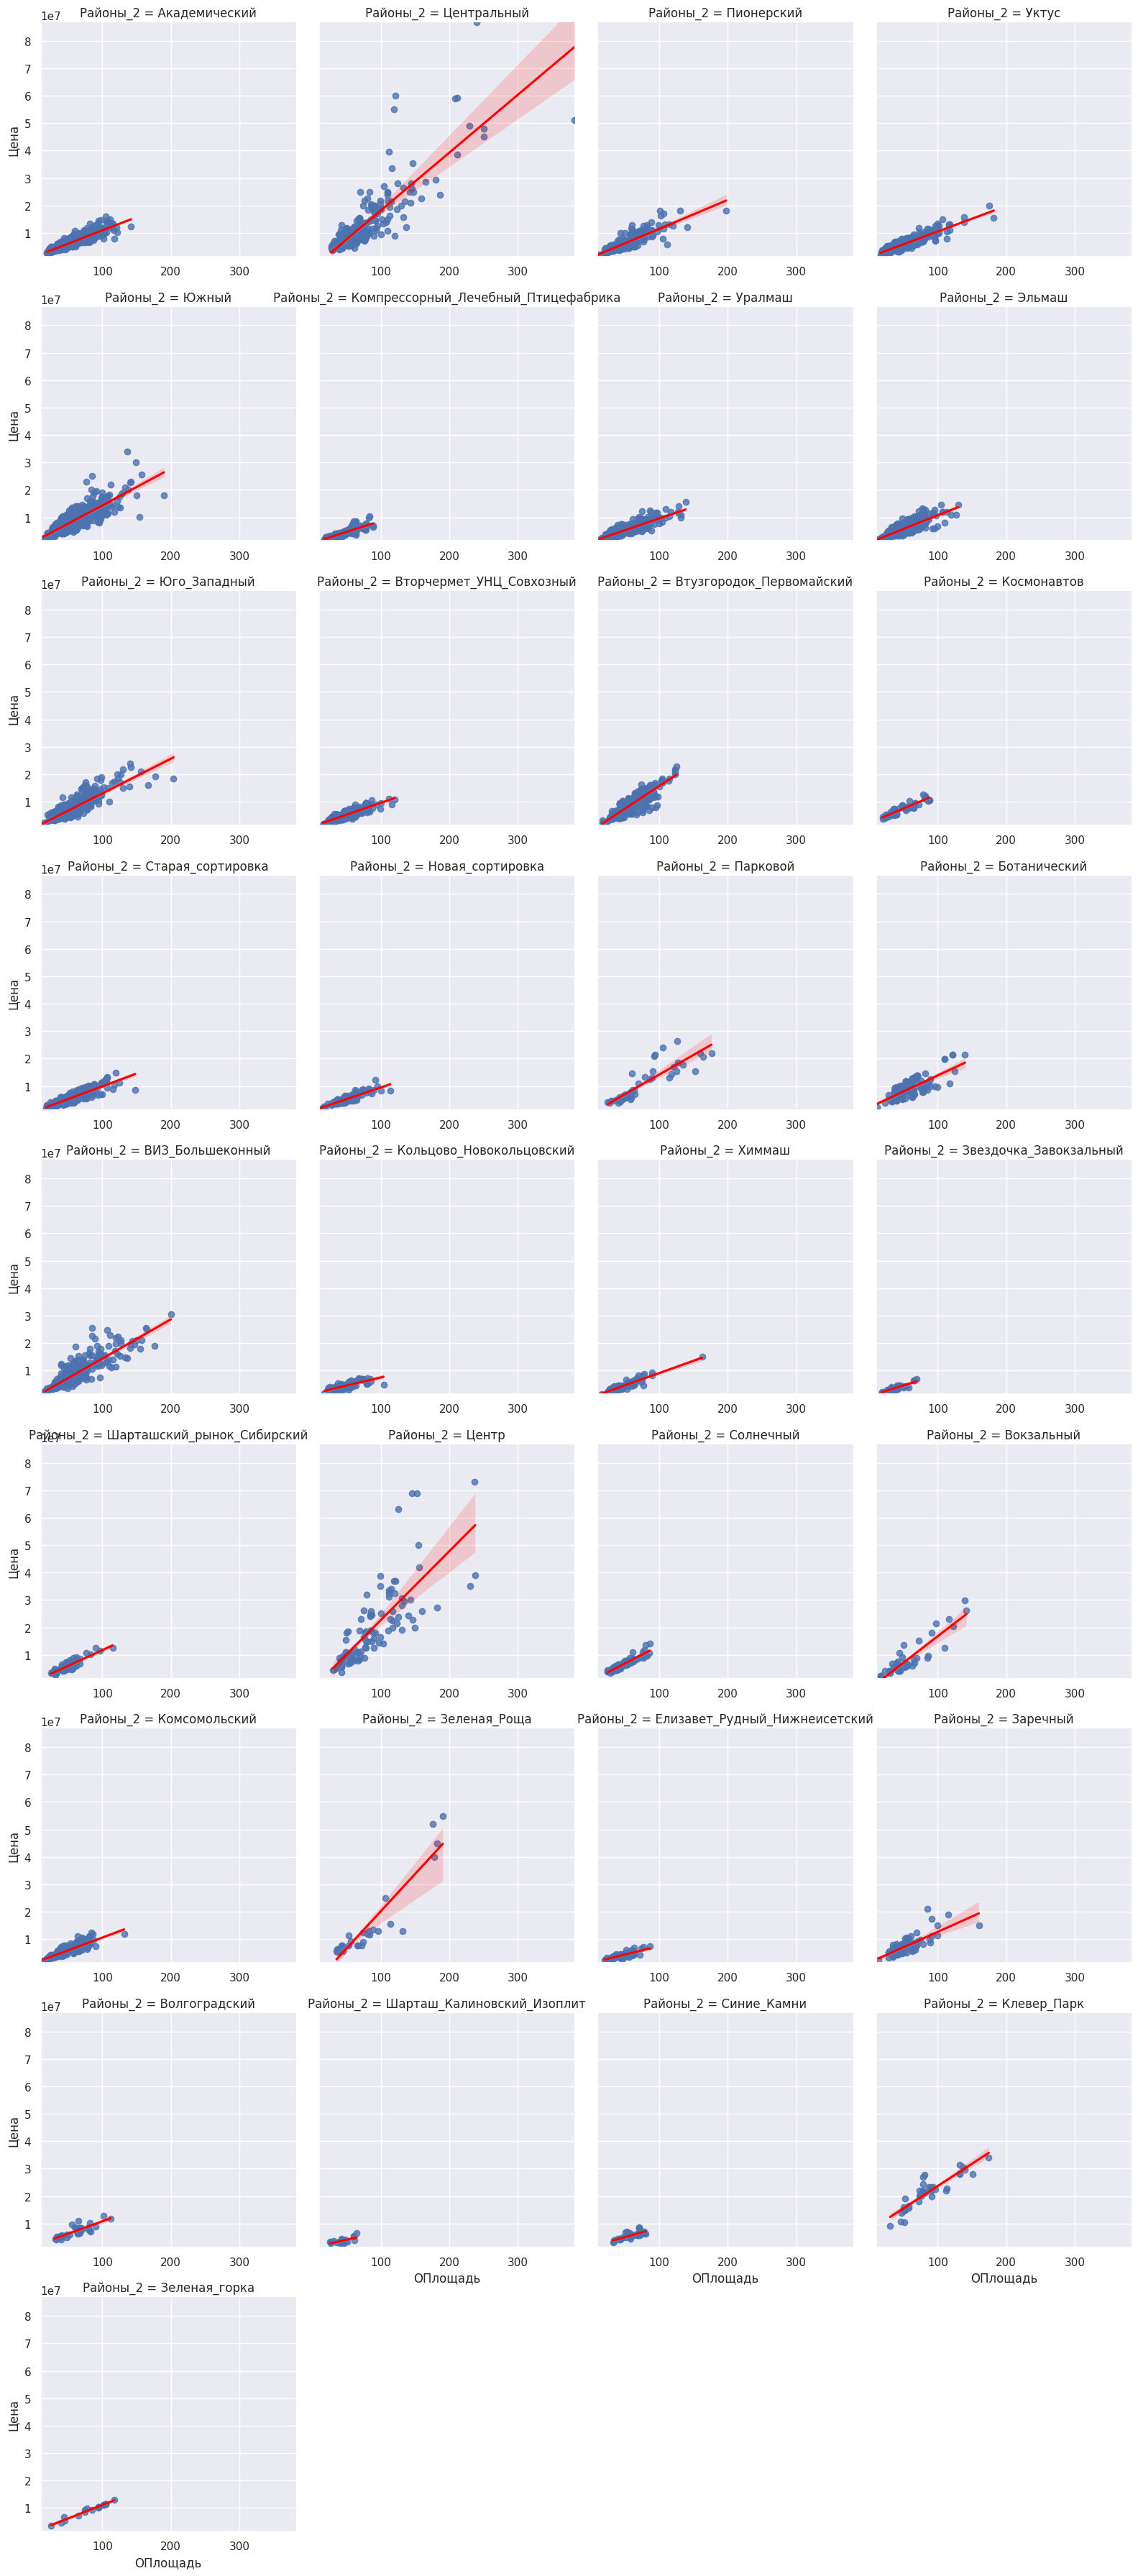

In [41]:
grid = sns.lmplot(x = "ОПлощадь", 
                  y = "Цена", 
                  col = "Районы_2", 
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4,
                  line_kws = {'color': 'red'}
                 )

x_min = df['ОПлощадь'].min()
x_max = df['ОПлощадь'].max()
y_min = df['Цена'].min()
y_max = df['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

# Зависимость цены от площади (Районы_5 или Районы_Kmeans)

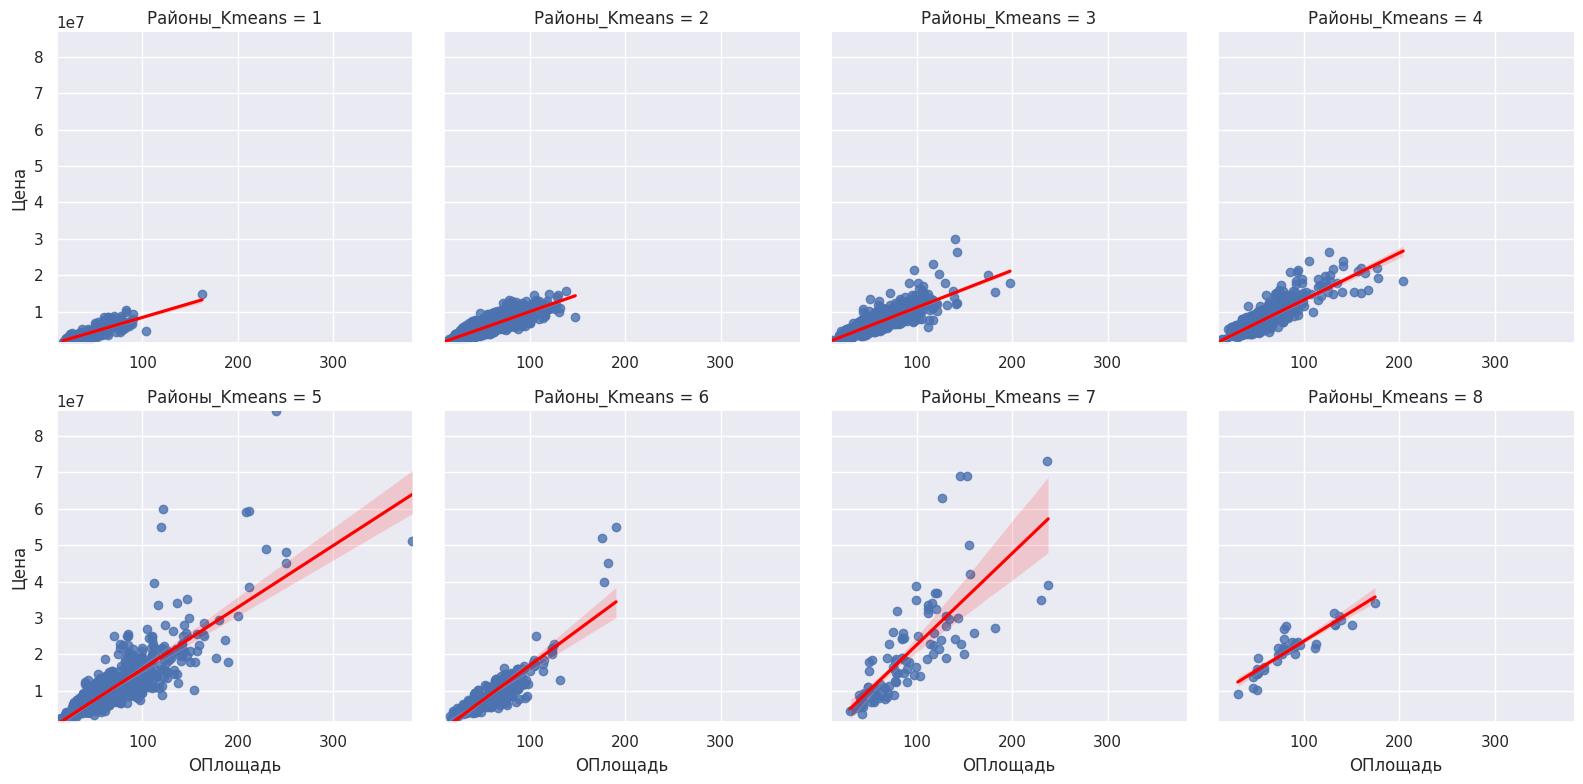

In [46]:
grid = sns.lmplot(x = "ОПлощадь", 
                  y = "Цена", 
                  col = "Районы_Kmeans",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4,
                  line_kws = {'color': 'red'} 
                 )
                  
x_min = df['ОПлощадь'].min()
x_max = df['ОПлощадь'].max()
y_min = df['Цена'].min()
y_max = df['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

# Зависимость цены от площади (Ремонт)

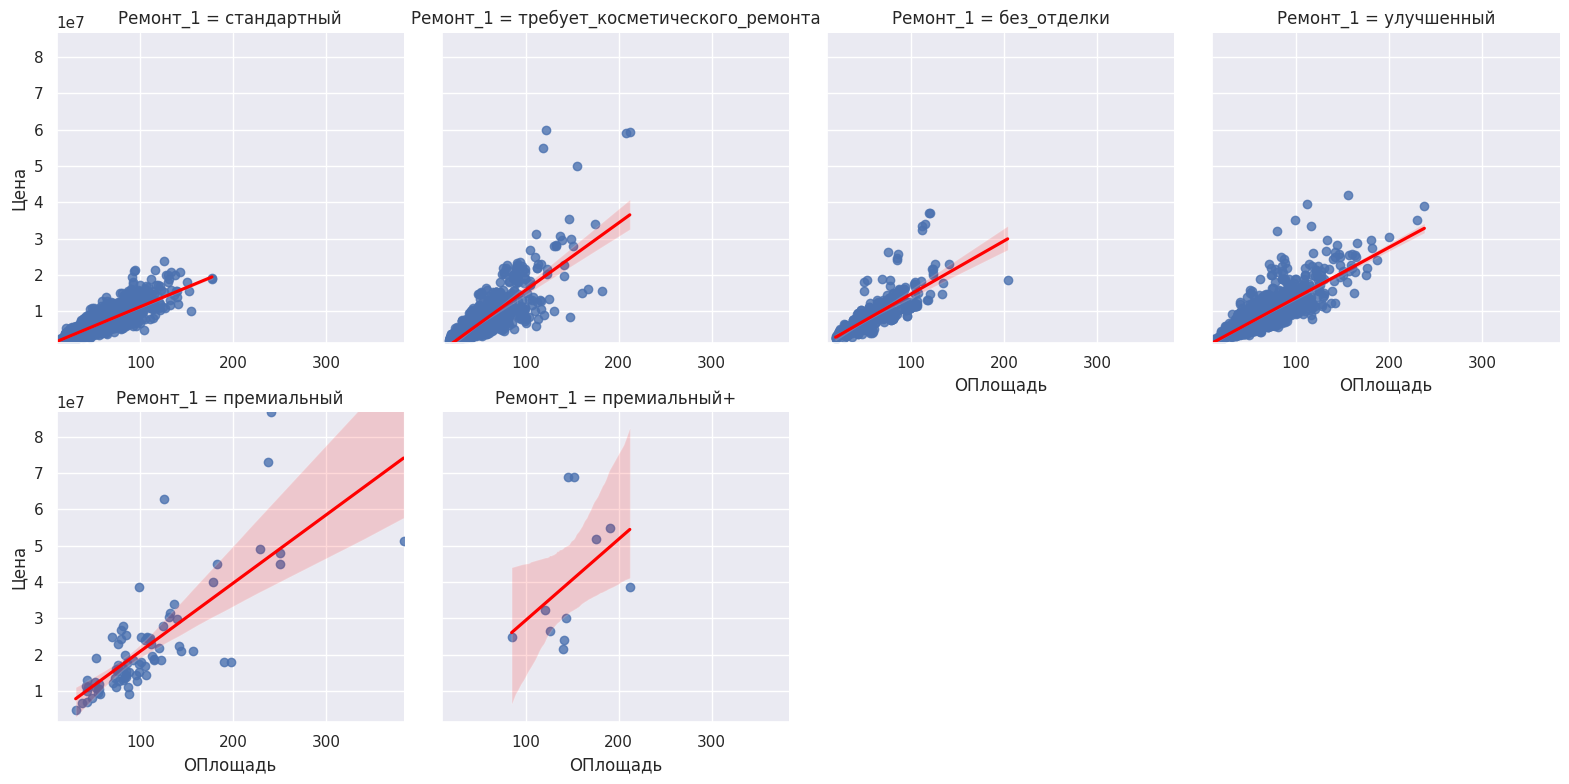

In [48]:
grid = sns.lmplot(x = "ОПлощадь", 
                  y = "Цена", 
                  col = "Ремонт_1",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4,
                  #hue = 'ЖК_БД',
                  line_kws = {'color': 'red'} 
                 )
                  
x_min = df['ОПлощадь'].min()
x_max = df['ОПлощадь'].max()
y_min = df['Цена'].min()
y_max = df['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

# Зависимость цены от площади (Год постройки)

Text(0, 0.5, 'Цена(кв.м)')

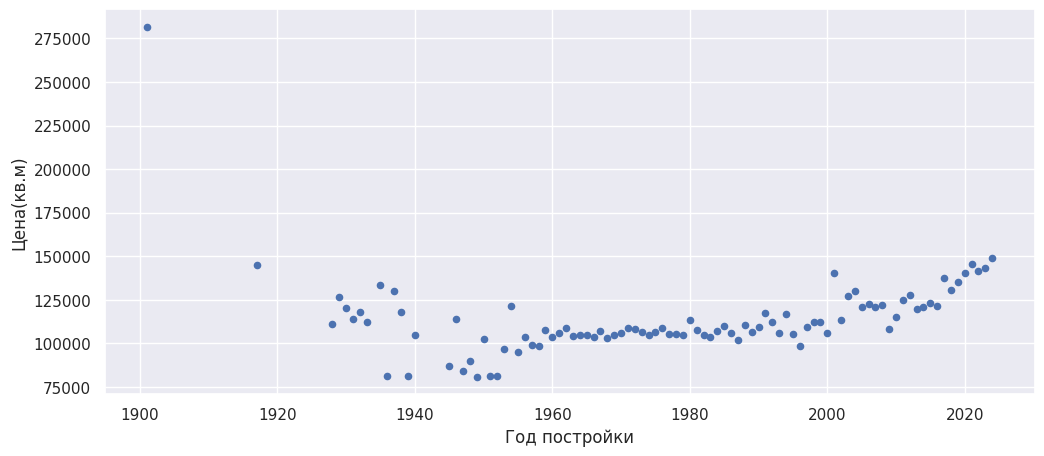

In [52]:
t = df.groupby('ГП')['Цена(кв.м)'].agg(['count','median'])
t = t.reset_index()

t.plot.scatter(x = 'ГП', y = 'median', figsize = (12, 5))
#plt.scatter(np.log(df['ОПлощадь']), np.log(df['Цена']))

plt.xlabel('Год постройки')
plt.ylabel('Цена(кв.м)')

In [60]:
s_1 = df['ГП'] <= 1940
s_2 = df['Цена(кв.м)'] >= 160000

#sort_1 = df[s_1 & s_2]
sort_1 = df[s_1]

In [61]:
df_1 = df.drop(index = list(sort_1.index))
print(len(df))
print(len(df_1))

7890
7823


Text(0, 0.5, 'Цена(кв.м)')

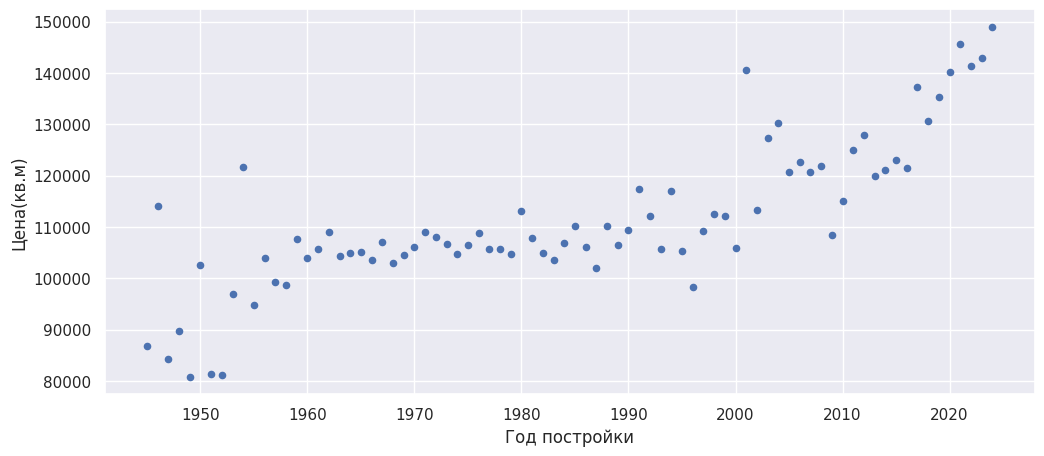

In [62]:
t = df_1.groupby('ГП')['Цена(кв.м)'].agg(['count','median'])
t = t.reset_index()
t.plot.scatter(x = 'ГП', y = 'median', figsize = (12, 5))
#plt.scatter(np.log(df['ОПлощадь']), np.log(df['Цена']))

plt.xlabel('Год постройки')
plt.ylabel('Цена(кв.м)')

In [63]:
df_1['Year_group'] = pd.cut(df_1['ГП'], [0, 1960, 1980, 2000, 2010, 2025])
t = df_1.groupby('Year_group', dropna = False)['Цена(кв.м)'].agg(['count', 'mean', 'median'])
t

count           mean         median
Year_group                                       
(0, 1960]       348  103795.871709   99568.081344
(1960, 1980]   1774  109526.553744  106091.527520
(1980, 2000]   1151  111432.824933  108280.254777
(2000, 2010]    753  130175.846875  121276.595745
(2010, 2025]   3797  145596.785640  137009.646302

/opt/conda/python37/lib/python3.7/site-packages/seaborn/regression.py:582: UserWarning:

sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



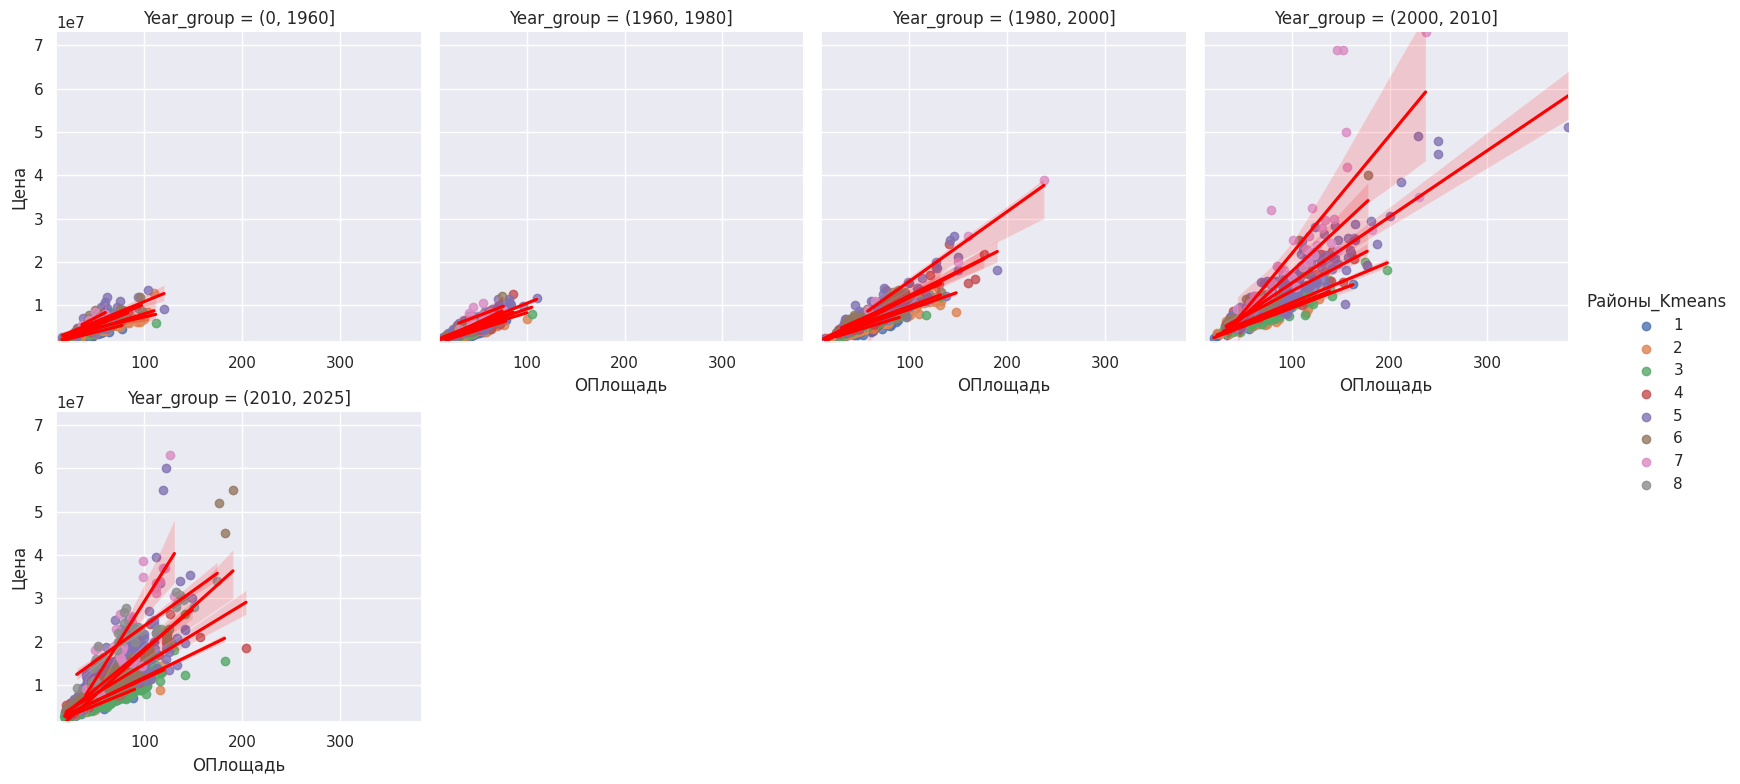

In [64]:
grid = sns.lmplot(x = "ОПлощадь", 
                  y = "Цена", 
                  col = "Year_group",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df_1, 
                  height = 4,
                  line_kws = {'color': 'red'},
                  hue = 'Районы_Kmeans'
                 )
                  
x_min = df_1['ОПлощадь'].min()
x_max = df_1['ОПлощадь'].max()
y_min = df_1['Цена'].min()
y_max = df_1['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))

# Заключение

Обращаю внимание, что зависимость цены от площади можно также смотреть в разрезе других категориальных факторов: класс ЖК, этаж, этажность и т.д.